<a href="https://colab.research.google.com/github/Keren-Neeq/DS4A-Team1/blob/main/notebooks/Team1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How Remote Work Is Transforming America's Geographical Landscape
Team #1 | Ashek Ag Mohamed, Caprina Beal, Nzinga Eduardo Rodriguez, Keren Osabutey, Erika Smith

## Business Problem
### Overview

One of the most significant impacts of the Covid-19 pandemic may be a shift in how the workplace and workforce operate in the future. According to Forbes, approximately 5% of white-collar employees in the U.S. worked primarily from home before the outbreak. This figure skyrocketed to 71% during the pandemic. If given a choice to continue working from home post-pandemic, 54% of these workers indicated they would continue to do so, according to Pew Research Center. These figures will likely vary across occupations, industries, income, and education levels. As remote work becomes more popular, white-collar workers are likely to relocate from city centers to suburban areas, accelerating and changing geographic trends.

A report by the Economic Innovation Group (EIG) indicated that more than two-thirds of large urban counties saw their populations decline. Marking the first time in 50 years, counties with a population over 250,000  experienced negative growth. Although migration patterns had been in effect before Covid-19, the explosion of remote work during the pandemic, reductions in births, rising deaths, and delayed immigration accelerated the shift. EIG indicated other contributing factors, including high median home and apartment rental prices, low housing inventory, and increasing costs of consumer goods such as gas. 

Using data curated from Glassdoor, Zillow, the U.S. Department of Housing, the U.S. Bureau of Labor Statistics, and the U.S. Census Bureau, our analysis will answer the following:


1.   What are the top 10 cities in the U.S. with the most remote work opportunities?
2.   What are the top 10 states with the most remote work opportunities?
3.   Which jobs are likely to experience more significant increases in remote work?
4.   Which workers are most likely to have the option to work from home?
5.   How have city growth rates changed, and how is the population shifting?
6.   How have the average annual expenditures and population characteristics changed?
7.   How have the average home, and rent prices changed over time?
8.   What are the real estate implications of an increase in remote work?
9.   Is there a correlation between inflation, home prices, and rent prices?
10.   Has the inflation rate affected housing inventory? 
11. How has the cost of consumer goods changed?
12. What changes have occurred over time for consumer spending? 


In [84]:
import os
import re
import io
import sys
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

sys.path.insert(0, "../utils")

from google.colab import files

warnings.filterwarnings('ignore')

In [85]:
%matplotlib inline

In [86]:
sns.set(context='talk',style = 'whitegrid')

## Load Datasets



In [ ]:
uploaded = files.upload()

In [91]:
hud_df = pd.read_csv(io.BytesIO(uploaded['clean_hud.csv']))

In [87]:
hud_df.head(5)

,,studio_18,studio_19,studio_20,studio_21,studio_22,1bdrm_18,1bdrm_19,1bdrm_20,1bdrm_21,1bdrm_22,...,3bdrm_18,3bdrm_19,3bdrm_20,3bdrm_21,3bdrm_22,4bdrm_18,4bdrm_19,4bdrm_20,4bdrm_21,4bdrm_22
area_name,state,,,,,,,,,,,,,,,,,,,,,
Phoenix,AZ,744,847,933,1005,1344,868,958,1032,1091,1467,...,1551,1676,1765,1825,2386,1776,1916,2010,2078,2716
Los_Angeles,CA,1158,1279,1369,1384,1534,1384,1517,1605,1604,1747,...,2401,2614,2735,2693,2888,2641,2857,2982,2933,3170
Sacramento,CA,853,952,1060,1108,1277,968,1072,1188,1228,1400,...,1764,1946,2140,2192,2496,2143,2368,2588,2625,2907
San_Francisco,CA,1822,2197,2350,2115,2156,2255,2720,2923,2631,2665,...,3663,4365,4567,4111,3912,3912,4657,4970,4473,4283
Chicago,IL,915,956,1012,1059,1158,1044,1076,1122,1161,1255,...,1542,1585,1649,1697,1827,1844,1888,1969,2018,2172


### Pre-Processing

#### HUD Dataset

In [88]:
# Count rows with NA
for col in hud_df.columns:
    print("{0} has {1} rows with NA".format(col, hud_df[col].isnull().values.ravel().sum()))

studio_18 has 0 rows with NA
studio_19 has 0 rows with NA
studio_20 has 0 rows with NA
studio_21 has 0 rows with NA
studio_22 has 0 rows with NA
1bdrm_18 has 0 rows with NA
1bdrm_19 has 0 rows with NA
1bdrm_20 has 0 rows with NA
1bdrm_21 has 0 rows with NA
1bdrm_22 has 0 rows with NA
2bdrm_18 has 0 rows with NA
2bdrm_19 has 0 rows with NA
2bdrm_20 has 0 rows with NA
2bdrm_21 has 0 rows with NA
2bdrm_22 has 0 rows with NA
3bdrm_18 has 0 rows with NA
3bdrm_19 has 0 rows with NA
3bdrm_20 has 0 rows with NA
3bdrm_21 has 0 rows with NA
3bdrm_22 has 0 rows with NA
4bdrm_18 has 0 rows with NA
4bdrm_19 has 0 rows with NA
4bdrm_20 has 0 rows with NA
4bdrm_21 has 0 rows with NA
4bdrm_22 has 0 rows with NA


In [89]:
hud_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10 entries, ('Phoenix', 'AZ') to ('Seattle', 'WA')
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   studio_18  10 non-null     int64
 1   studio_19  10 non-null     int64
 2   studio_20  10 non-null     int64
 3   studio_21  10 non-null     int64
 4   studio_22  10 non-null     int64
 5   1bdrm_18   10 non-null     int64
 6   1bdrm_19   10 non-null     int64
 7   1bdrm_20   10 non-null     int64
 8   1bdrm_21   10 non-null     int64
 9   1bdrm_22   10 non-null     int64
 10  2bdrm_18   10 non-null     int64
 11  2bdrm_19   10 non-null     int64
 12  2bdrm_20   10 non-null     int64
 13  2bdrm_21   10 non-null     int64
 14  2bdrm_22   10 non-null     int64
 15  3bdrm_18   10 non-null     int64
 16  3bdrm_19   10 non-null     int64
 17  3bdrm_20   10 non-null     int64
 18  3bdrm_21   10 non-null     int64
 19  3bdrm_22   10 non-null     int64
 20  4bdrm_18   10 non-null   

In [90]:
hud_df.describe()

,studio_18,studio_19,studio_20,studio_21,studio_22,1bdrm_18,1bdrm_19,1bdrm_20,1bdrm_21,1bdrm_22,...,3bdrm_18,3bdrm_19,3bdrm_20,3bdrm_21,3bdrm_22,4bdrm_18,4bdrm_19,4bdrm_20,4bdrm_21,4bdrm_22
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1162.200000,1312.400000,1380.600000,1433.700000,1591.700000,1323.300000,1478.900000,1543.70000,1583.000000,1741.400000,...,2155.000000,2377.800000,2444.100000,2468.600000,2659.300000,2442.700000,2693.400000,2778.000000,2800.700000,3013.900000
std,366.115282,461.818675,462.302018,431.407013,401.519351,434.194542,561.114259,583.01821,517.172011,479.107318,...,692.011239,889.985493,897.601303,786.083287,676.257191,694.410069,894.696746,911.616513,789.336578,671.921201
min,744.000000,847.000000,933.000000,1005.000000,1158.000000,868.000000,957.000000,1031.00000,1091.000000,1245.000000,...,1455.000000,1484.000000,1539.000000,1587.000000,1758.000000,1738.000000,1822.000000,1930.000000,1975.000000,2172.000000
25%,868.500000,953.000000,1023.750000,1082.250000,1259.000000,987.000000,1073.000000,1138.50000,1177.750000,1389.500000,...,1596.750000,1697.750000,1785.750000,1835.500000,2162.500000,1907.750000,1969.000000,2059.250000,2107.000000,2491.000000
50%,1044.500000,1133.500000,1214.500000,1246.000000,1439.000000,1235.000000,1325.500000,1405.50000,1420.000000,1607.000000,...,2044.000000,2209.000000,2369.000000,2442.500000,2692.000000,2309.000000,2505.500000,2686.000000,2779.000000,3038.500000
75%,1410.500000,1655.500000,1687.250000,1770.750000,1976.000000,1560.000000,1734.250000,1752.00000,1924.250000,2097.750000,...,2396.500000,2813.500000,2724.750000,2913.000000,3046.750000,2623.500000,3062.500000,3121.500000,3233.000000,3413.500000
max,1822.000000,2197.000000,2350.000000,2115.000000,2156.000000,2255.000000,2720.000000,2923.00000,2631.000000,2665.000000,...,3663.000000,4365.000000,4567.000000,4111.000000,3912.000000,3912.000000,4657.000000,4970.000000,4473.000000,4283.000000


In [92]:
# Removing county_name, census_region, population for 2000, 2010, & 2017
hud_df = hud_df.drop(['fips','county_name', 'pop2000','pop2010','pop2017','census_region'], axis=1)

In [93]:
hud_df.rename(columns = {'fmr23_0': 'studio_22', 'fmr23_1':'1bdrm_22',
       'fmr23_2':'2bdrm_22', 'fmr23_3':'3bdrm_22', 'fmr23_4':'4bdrm_22', 'fmr22_0':'studio_21',
       'fmr22_1':'1bdrm_21', 'fmr22_2':'2bdrm_21', 'fmr22_3':'3bdrm_21', 'fmr22_4':'4bdrm_21', 
       'fmr21_0':'studio_20', 'fmr21_1':'1bdrm_20', 'fmr21_2':'2bdrm_20', 'fmr21_3':'3bdrm_20',
       'fmr21_4':'4bdrm_20', 'fmr20_0':'studio_19', 'fmr20_1':'1bdrm_19', 'fmr20_2':'2bdrm_19', 
       'fmr20_3':'3bdrm_19', 'fmr20_4':'4bdrm_19','fmr19_0':'studio_18','fmr19_1':'1bdrm_18',
       'fmr19_2':'2bdrm_18', 'fmr19_3':'3bdrm_18', 'fmr19_4':'4bdrm_18'}, inplace=True)


Reorder the columns from 2018 to 2022 to get the correct calculation for % change. Original file has the columns ordered from 2022 to 2018.

In [94]:
hud_df = hud_df[['state', 'area_name','studio_18','studio_19','studio_20','studio_21','studio_22','1bdrm_18','1bdrm_19',
      '1bdrm_20','1bdrm_21','1bdrm_22','2bdrm_18','2bdrm_19','2bdrm_20','2bdrm_21','2bdrm_22','3bdrm_18','3bdrm_19',
      '3bdrm_20','3bdrm_21','3bdrm_22','4bdrm_18','4bdrm_19','4bdrm_20','4bdrm_21','4bdrm_22']]

In [95]:
hud_df = hud_df.set_index(['area_name', 'state'])

#### Calculate annual apartment rent price change in dollars and as a percentage

In [96]:
percentdf = hud_df.pct_change(axis="columns") 
pricedf = hud_df.diff(axis = 1)

In [97]:
# Drop unnecessary columns, i.e. columns containing data from 2019
pricedf = pricedf.drop(['4bdrm_18','3bdrm_18', '2bdrm_18', '1bdrm_18','studio_18'], axis = 1)
percentdf = percentdf.drop(['4bdrm_18','3bdrm_18', '2bdrm_18', '1bdrm_18','studio_18'], axis = 1)

In [98]:
percentdf.reset_index(inplace = True)
pricedf.reset_index(inplace = True)

In [99]:
# Reshape data
percentdf = pd.melt(percentdf.reset_index(), id_vars =['area_name', 'state'], var_name = 'apartment_type', value_vars=['studio_19','studio_20','studio_21','studio_22','1bdrm_19',
      '1bdrm_20','1bdrm_21','1bdrm_22','2bdrm_19','2bdrm_20','2bdrm_21','2bdrm_22','3bdrm_19',
      '3bdrm_20','3bdrm_21','3bdrm_22','4bdrm_19','4bdrm_20','4bdrm_21','4bdrm_22'], value_name = 'percent_chg')

pricedf = pd.melt(pricedf.reset_index(), id_vars =['area_name', 'state'], var_name = 'apartment_type', value_vars=['studio_19','studio_20','studio_21','studio_22','1bdrm_19',
      '1bdrm_20','1bdrm_21','1bdrm_22','2bdrm_19','2bdrm_20','2bdrm_21','2bdrm_22','3bdrm_19',
      '3bdrm_20','3bdrm_21','3bdrm_22','4bdrm_19','4bdrm_20','4bdrm_21','4bdrm_22'], value_name = 'amount_diff')

#### Merge percentdf with pricedf

In [100]:
# Combine percentdf and pricedf

merged_df = pd.merge(pricedf, percentdf, on = ['area_name', 'state', 'apartment_type'])

In [101]:
merged_df

,area_name,state,apartment_type,amount_diff,percent_chg
0,Phoenix,AZ,studio_19,103,0.138441
1,Los_Angeles,CA,studio_19,121,0.104491
2,Sacramento,CA,studio_19,99,0.116061
3,San_Francisco,CA,studio_19,375,0.205818
4,Chicago,IL,studio_19,41,0.044809
...,...,...,...,...,...
195,Boston,MA,4bdrm_22,287,0.088226
196,New_York,NY,4bdrm_22,143,0.045068
197,Nashville,TN,4bdrm_22,198,0.100253
198,Austin,TX,4bdrm_22,222,0.101185


In [102]:
merged_df.rename(columns = {'area_name': 'City', 'state':'State', 'amount_diff':'Price Difference', 'percent_chg':'Percent Difference'}, inplace=True)


In [103]:
# Extract number of bedrooms and year from apartment_type column
merged_df[['Bedroom','Year']] = merged_df['apartment_type'].str.split('_', expand=True)

In [104]:
# Replace year with annual range
yeardict = {'19': '2018-2019', '20':'2019-2020', '21':'2020-2021', '22':'2021-2022'}

merged_df['Year'] = merged_df['Year'].map(yeardict)
merged_df

,City,State,apartment_type,Price Difference,Percent Difference,Bedroom,Year
0,Phoenix,AZ,studio_19,103,0.138441,studio,2018-2019
1,Los_Angeles,CA,studio_19,121,0.104491,studio,2018-2019
2,Sacramento,CA,studio_19,99,0.116061,studio,2018-2019
3,San_Francisco,CA,studio_19,375,0.205818,studio,2018-2019
4,Chicago,IL,studio_19,41,0.044809,studio,2018-2019
...,...,...,...,...,...,...,...
195,Boston,MA,4bdrm_22,287,0.088226,4bdrm,2021-2022
196,New_York,NY,4bdrm_22,143,0.045068,4bdrm,2021-2022
197,Nashville,TN,4bdrm_22,198,0.100253,4bdrm,2021-2022
198,Austin,TX,4bdrm_22,222,0.101185,4bdrm,2021-2022


In [105]:
merged_df.drop(columns = 'apartment_type', inplace=True)

In [106]:
merged_df['City'] = merged_df['City'].str.replace("_"," ")
merged_df['Bedroom'] = merged_df['Bedroom'].str.split('bdrm', expand = True)[0]

In [107]:
merged_df

,City,State,Price Difference,Percent Difference,Bedroom,Year
0,Phoenix,AZ,103,0.138441,studio,2018-2019
1,Los Angeles,CA,121,0.104491,studio,2018-2019
2,Sacramento,CA,99,0.116061,studio,2018-2019
3,San Francisco,CA,375,0.205818,studio,2018-2019
4,Chicago,IL,41,0.044809,studio,2018-2019
...,...,...,...,...,...,...
195,Boston,MA,287,0.088226,4,2021-2022
196,New York,NY,143,0.045068,4,2021-2022
197,Nashville,TN,198,0.100253,4,2021-2022
198,Austin,TX,222,0.101185,4,2021-2022


## EDA

### What are top 10 cities in U.S. the most remote work opportunities? 

### What are top 10 states with the most remote work opportunities?

### Which jobs are likely to experience more significant increases in remote work?

### Which workers are most likely to have the option to work from home?

### How have city growth rates changed and how is the population shifting?

### How have the average annual expenditures and population characteristics changed?

### How have the average home and apartment rental prices changed over time?

#### Plot the apartment rental price changed for each city and for years 2019 - 2022

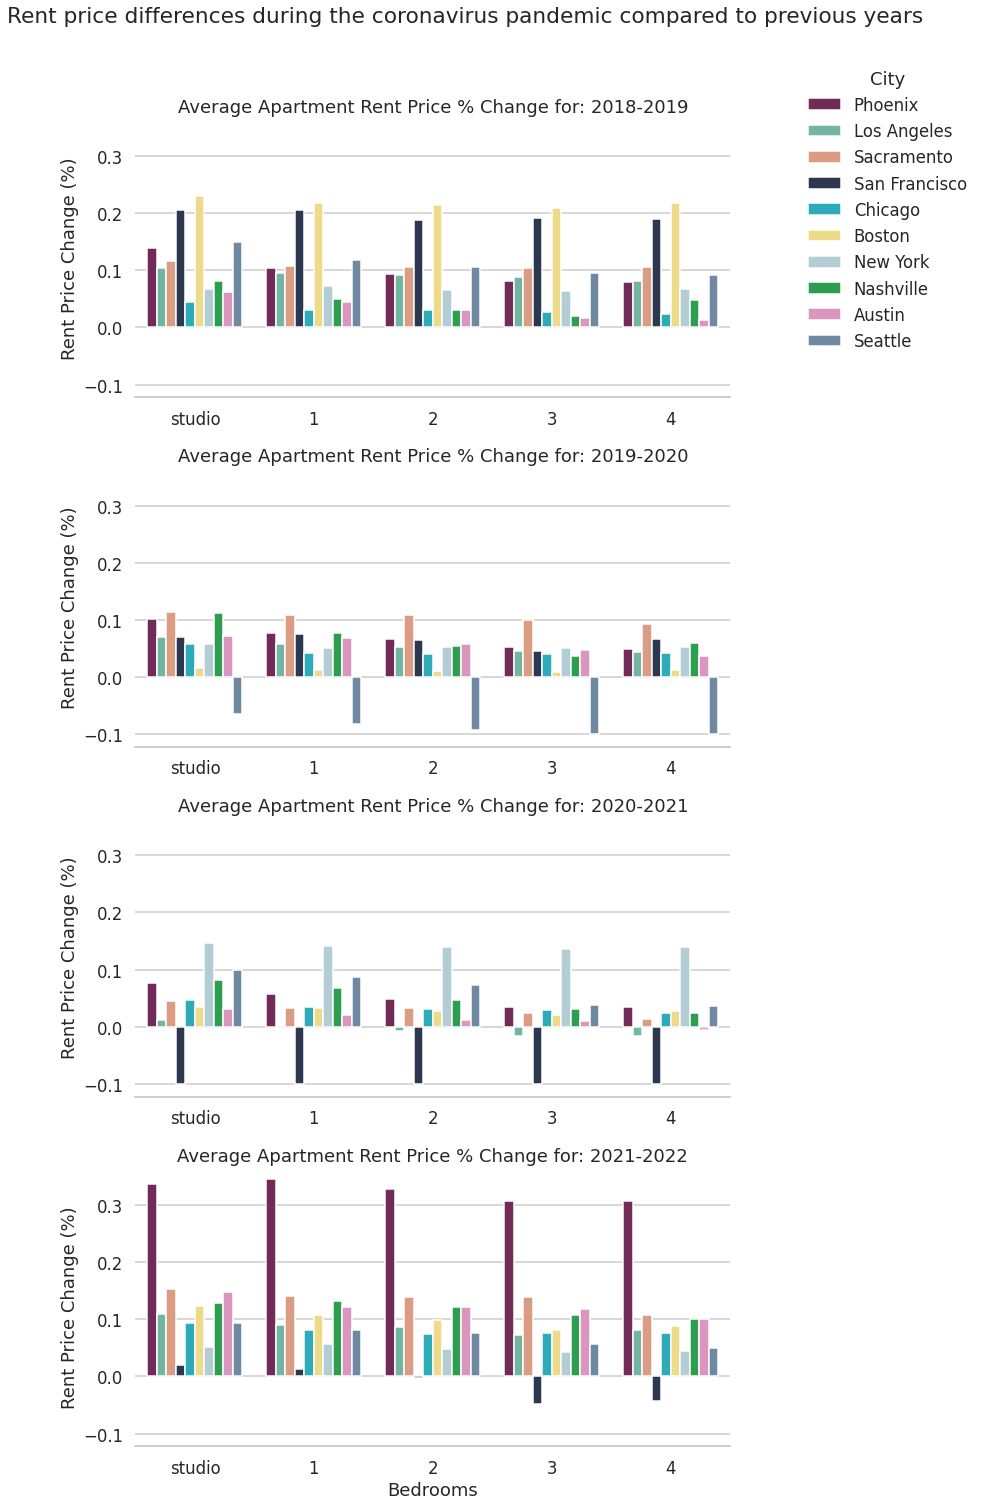

In [108]:
colors = ["#7e1e59","#66c2a5","#ea9675","#263655","#17becf","#ffe579","#add0d8","#1ab048","#e78ac3","#668aaa"]
sns.set_palette(sns.color_palette(colors))

f = sns.catplot(data = merged_df, x = 'Bedroom', y= 'Percent Difference', kind = 'bar', col = 'Year', hue = 'City',
            col_wrap= 1, sharex = False, height=5, aspect = 2)
f.despine(left=True)
f.fig.suptitle("Rent price differences during the coronavirus pandemic compared to previous years", y=1.05)
f.set_titles("Average Apartment Rent Price % Change for: {col_name}")
f.set_axis_labels('Bedrooms','Rent Price Change (%)')
f.set_xticklabels(rotation = 'horizontal')
sns.move_legend(f, "center right",frameon=False, bbox_to_anchor = (1.1,0.9))

plt.show()

In [109]:
# Highlight rent with most significant annual drop

def highlight_min(cell):
    if type(cell) != str and cell < 0 :
        return 'color: red'
    else:
        return 'color: black'

In [110]:
merged_df.style.format({"Price Difference":"${:20,.0f}", 
                        "Percent Difference":"{:.1%}"}).hide_index()\
                        .applymap(highlight_min)


City,State,Price Difference,Percent Difference,Bedroom,Year
Phoenix,AZ,$ 103,13.8%,studio,2018-2019
Los Angeles,CA,$ 121,10.4%,studio,2018-2019
Sacramento,CA,$ 99,11.6%,studio,2018-2019
San Francisco,CA,$ 375,20.6%,studio,2018-2019
Chicago,IL,$ 41,4.5%,studio,2018-2019
Boston,MA,$ 321,23.0%,studio,2018-2019
New York,NY,$ 106,6.8%,studio,2018-2019
Nashville,TN,$ 68,8.2%,studio,2018-2019
Austin,TX,$ 57,6.1%,studio,2018-2019
Seattle,WA,$ 211,14.9%,studio,2018-2019


### **Description of Key Findings for HUD dataset**

##### Before the pandemic, from 2018 to 2019, rental price changes across bedroom types were approximately 5 - 23% for each of the top 10 cities selected for analysis; Boston had the highest price change and Chicago had the lowest price change. As the pandemic began, from 2019 to 2020 the price changes ranged from approximately –10% for Seattle, across all bedroom types,  to ~ 11% for Sacramento. As the pandemic progressed from 2020 to 2021, the price changes declined significantly for Sacramento with a 10% decline. Additionally, Los Angeles experienced the second highest rent price decrease with an ~  – 1% decline across all bedroom types which implies that it may have experienced a population decline resulting in a decrease in demand for rentals. From 2021 to 2022, Phoenix shows a dramatic ~ 30% increase in its rental price change, which suggests that there may have been a large increase in the population of residents seeking rental units which drove up the prices. In addition, San Francisco continued its decline in the 2 - 4 bedroom type category and had a very slight increase in the studio and 1 bedroom types which implies that San Francisco had a decline in its population which lead to a decrease in rental prices. 


### What are the real estate implications of an increase in remote work?

### Is there a correlation between inflation, home prices and rent prices?

### Has the inflation rate affected housing inventory?

### How has the cost of consumer goods changed?

### What changes have occurred over time for consumer spending?